In [1]:
from docx import Document
import os

In [2]:
from numba.core.errors import NumbaDeprecationWarning, NumbaPendingDeprecationWarning
import warnings

warnings.simplefilter('ignore', category=NumbaDeprecationWarning)
warnings.simplefilter('ignore', category=NumbaPendingDeprecationWarning)

In [3]:
from bertopic import BERTopic
import numpy as np
from time import sleep
import pickle
import os
import gensim
from nltk.stem import WordNetLemmatizer

In [4]:
def get_ques_list(folder):
    os.chdir(folder)
    list_of_files = os.listdir()
    all_ques = {}
    for filename in list_of_files:
        if(filename[len(filename)-5:] == '.docx'):
            doc = Document(filename)
            # print(filename)
            # print(doc)

            fullText = []
            for para in doc.paragraphs:
                # print(para.text)
                fullText.append(para.text)
            # doctxt =  '\n'.join(fullText)
            doctxt = fullText
            fullText = []
            for eachl in doctxt:
                # print(eachl)
                if len(eachl) == 0:
                    continue
                elif eachl[0] == 'Q':
                    fullText.append(eachl.split(" ", 1)[1])   # for networking "." -> " "
                else:
                    fullText[len(fullText)-1] = fullText[len(fullText)-1] + ' ' + eachl

            all_ques[filename[:len(filename)-5]] = fullText
            # all_ques = all_ques + fullText
            # print(doctxt)
            # print(fullText)
    os.chdir("..")
    return all_ques

In [5]:
def ls(text):
    return WordNetLemmatizer().lemmatize(text, pos='v')

# Tokenize and lemmatize
def pp(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 1:         # for networking > 1
            result.append(ls(token))
    result = ' '.join(result)
    return result

In [6]:
def check_for(folder):
    ques_list_per_company = get_ques_list(folder)
    os.chdir(folder)
    print(os.getcwd(), '\n Now importing model\n')

    model = BERTopic.load('model_cpu_no_len')     # default stored using 'model_cpu'

    for key, value in ques_list_per_company.items():
        print("For company : ", key)
        ques_list = value
        for ques in ques_list:
            print("Before prepro : ", ques)
            # for predicting the topics for any new sentence
            new_check = pp(ques)
            print("After prepro : ", new_check)

            #  Find topics
            num_of_topics = 3
            similar_topics, similarity = model.find_topics(new_check, top_n=num_of_topics)

            print(
                f'The top {num_of_topics} similar topics are {similar_topics}, and the similarities are {np.round(similarity, 2)}')

            # for printing those 3 topics
            for index, top in enumerate(similar_topics):
                keys = [t[0] for t in model.get_topic(top)]
                print(f'{keys} : with probability \n{np.round(similarity, 2)[index]}')

            print()
            sleep(1)
    print()
    print()

    os.chdir('..')

In [7]:
os.chdir("theory")


In [8]:
print(os.getcwd())           # model : model_cpu_no_len  ,  preprocessing : no len
check_for("Networking")

C:\Users\hp\PycharmProjects\placement\theory
C:\Users\hp\PycharmProjects\placement\theory\Networking 
 Now importing model

For company :  Amazon
Before prepro :  What do you mean by network topology?
After prepro :  mean network topology
The top 3 similar topics are [178, 185, 97], and the similarities are [0.39 0.38 0.37]
['interconnected', 'collection', 'internetworks', 'internetwork', 'autonomous', 'internet', 'connected', 'distinction', 'organizes', 'kevin'] : with probability 
0.39
['subnet', 'subnets', 'split', 'operator', 'tender', 'disappointing', 'formed', 'usage', 'fuzzballs', 'contiguous'] : with probability 
0.38
['ospf', 'bgp', 'gateway', 'intradomain', 'routing', 'border', 'as', 'exterior', 'interior', 'shortest'] : with probability 
0.37

Before prepro :  What are the advantages of Distributed Processing?
After prepro :  advantage distribute process
The top 3 similar topics are [176, 200, 65], and the similarities are [0.45 0.38 0.38]
['advantage', 'strategy', 'benefit'

Before prepro :  Which of the following are the PaaS characteristics that define it as a cloud service?  1. Builds on virtualization technology  2. Provides a variety of services to assist with the development, testing, and deployment of apps 3. Integrates web services and databases A. All 1, 2 and 3 B. 1 and 3 C. 1 and 2 D. 2 and 3 
After prepro :  follow paas characteristics define cloud service build virtualization technology provide variety service assist development test deployment apps integrate web service databases
The top 3 similar topics are [320, 140, 67], and the similarities are [0.23 0.22 0.22]
['qos', 'admission', 'shaping', 'quality', 'guarantee', 'lumped', 'reserving', 'traffic', 'seek', 'service'] : with probability 
0.23
['quality', 'service', 'mechanism', 'integrated', 'requirement', 'differentiated', 'idling', 'enforces', 'clearest', 'capability'] : with probability 
0.22
['virtual', 'circuit', 'vc', 'datagram', 'datagrams', 'identifier', 'set', 'internally', 'term

Before prepro :  Can you describe the process of how a packet is transmitted from one host to another on a network?
After prepro :  process packet transmit host network
The top 3 similar topics are [68, 21, 53], and the similarities are [0.43 0.35 0.34]
['udp', 'rpc', 'tcp', 'transport', 'connectionless', 'protocol', 'compatible', 'raw', 'prefer', 'required'] : with probability 
0.43
['multicast', 'group', 'multicasting', 'anycast', 'member', 'tree', 'spanning', 'routing', 'unicast', 'pim'] : with probability 
0.35
['ttl', 'packet', 'send', 'incoming', 'destined', 'carry', 'mckenny', 'asterisk', 'scalability', 'fuss'] : with probability 
0.34

Before prepro :  What is a DMZ (Demilitarized Zone) and how is it used in network security?
After prepro :  dmz demilitarize zone network security
The top 3 similar topics are [118, 170, 64], and the similarities are [0.38 0.31 0.27]
['firewall', 'internal', 'rule', 'configured', 'external', 'perimeter', 'defense', 'attack', 'sa', 'applied'] : wi

In [9]:
def get_topic(folder):
    ques_list_per_company = get_ques_list(folder)
    os.chdir(folder)
    print(os.getcwd(), '\n Now importing model\n')

    model = BERTopic.load('model_cpu_no_len')     # default stored using 'model_cpu'
    
    all_topics_per_company = {}
    for key, value in ques_list_per_company.items():
        print("For company : ", key)
        ques_list = value
        one_company_topics = []
        for ques in ques_list:
            # for predicting the topics for any new sentence
            new_check = pp(ques)           # after preprocessing

            #  Find topics
            num_of_topics = 2
            similar_topics, similarity = model.find_topics(new_check, top_n=num_of_topics)
            for topic in similar_topics:
                one_company_topics.append(topic)
        all_topics_per_company[key] = one_company_topics
            
    os.chdir('..')
    return all_topics_per_company

In [10]:
print(os.getcwd())           # model : model_cpu_len_gt_2  ,  preprocessing : len > 2
list_of_topics_per_company = get_topic("Networking")
list_of_topics_per_company

C:\Users\hp\PycharmProjects\placement\theory
C:\Users\hp\PycharmProjects\placement\theory\Networking 
 Now importing model

For company :  Amazon
For company :  Google
For company :  Microsoft


{'Amazon': [178,
  185,
  176,
  200,
  266,
  196,
  65,
  63,
  145,
  185,
  185,
  80,
  68,
  51,
  168,
  122,
  118,
  97,
  128,
  20,
  76,
  67],
 'Google': [27,
  95,
  67,
  279,
  320,
  140,
  68,
  254,
  20,
  95,
  110,
  158,
  51,
  122,
  15,
  68,
  92,
  210],
 'Microsoft': [65,
  145,
  1,
  279,
  197,
  20,
  20,
  95,
  146,
  93,
  68,
  21,
  118,
  170,
  97,
  111,
  210,
  92,
  73,
  51,
  29,
  68,
  73,
  51,
  95,
  176,
  220,
  267]}

In [11]:
os.chdir('Networking')
model = BERTopic.load('model_cpu_no_len')
os.chdir('..')

In [38]:
acronym = {}
tp = model.get_topic_info()
for i in range(len(tp['Topic'])):
    print(tp['Topic'].iloc[i], '  :  ', tp['Count'].iloc[i], "  :  ", tp['Name'].iloc[i])
    acronym[tp['Topic'].iloc[i]] = tp['Name'].iloc[i].split(str(tp['Topic'].iloc[i])+'_')[1].split('_')[0] + '_' + str(tp['Topic'].iloc[i])


-1   :   9117   :   -1_time_bit_packet_error
0   :   609   :   0_telephone_phone_mobile_voice
1   :   248   :   1_dns_domain_record_query
2   :   199   :   2_site_web_search_unpopular
3   :   189   :   3_band_ghz_frequency_spectrum
4   :   185   :   4_frame_acknowledgement_sender_lost
5   :   180   :   5_alice_bob_ra_rb
6   :   177   :   6_browser_page_plug_dynamic
7   :   176   :   7_collision_slot_station_probability
8   :   172   :   8_connection_syn_fin_handshake
9   :   137   :   9_satellite_orbit_earth_iridium
10   :   134   :   10_html_xml_style_sheet
11   :   129   :   11_service_connectionless_transport_oriented
12   :   126   :   12_rfid_tag_reader_epc
13   :   120   :   13_cipher_ciphertext_block_plaintext
14   :   116   :   14_cache_caching_proxy_cached
15   :   114   :   15_protocol_scenario_solving_fail
16   :   97   :   16_adsl_modem_dsl_cable
17   :   93   :   17_agent_mailbox_mail_transfer
18   :   93   :   18_duplicate_lost_lifetime_packet
19   :   87   :   19_urity_u

In [39]:
for key,value in acronym.items():
    print(key, " : ", value)

-1  :  time_-1
0  :  telephone_0
1  :  dns_1
2  :  site_2
3  :  band_3
4  :  frame_4
5  :  alice_5
6  :  browser_6
7  :  collision_7
8  :  connection_8
9  :  satellite_9
10  :  html_10
11  :  service_11
12  :  rfid_12
13  :  cipher_13
14  :  cache_14
15  :  protocol_15
16  :  adsl_16
17  :  agent_17
18  :  duplicate_18
19  :  urity_19
20  :  ip_20
21  :  multicast_21
22  :  mbps_22
23  :  fiber_23
24  :  window_24
25  :  layer_25
26  :  congestion_26
27  :  isp_27
28  :  successor_28
29  :  port_29
30  :  peer_30
31  :  bucket_31
32  :  prefix_32
33  :  twisted_33
34  :  ethernet_34
35  :  cdn_35
36  :  bluetooth_36
37  :  home_37
38  :  routing_38
39  :  header_39
40  :  fragment_40
41  :  detail_41
42  :  mpeg_42
43  :  application_43
44  :  urity_44
45  :  frame_45
46  :  base_46
47  :  lan_47
48  :  mime_48
49  :  byte_49
50  :  fig_50
51  :  rfc_51
52  :  station_52
53  :  ttl_53
54  :  delay_54
55  :  transport_55
56  :  iv_56
57  :  link_57
58  :  division_58
59  :  rtp_59
60  :

In [21]:
topic_len = len(model.get_topic_info())
print(topic_len)

333


In [22]:
for i in range(1, topic_len+1):
    print(i-1," : ",model.get_topic(i-1))

0  :  [('telephone', 0.03363195374256582), ('phone', 0.030473795371640633), ('mobile', 0.02990702923840123), ('voice', 0.027509426724531903), ('office', 0.015460618317822528), ('call', 0.014528401230032755), ('toll', 0.011525710986265739), ('company', 0.011335578627535923), ('trunk', 0.010167959181688127), ('gsm', 0.009725873999875598)]
1  :  [('dns', 0.07625647224047849), ('domain', 0.07524191231352957), ('record', 0.037007096954852665), ('query', 0.03322704251330908), ('edu', 0.025370495603869475), ('zone', 0.02295456410293099), ('name', 0.022460273809324218), ('server', 0.020816117489862746), ('uw', 0.019099347494185098), ('database', 0.01633474458859943)]
2  :  [('site', 0.037474090359604084), ('web', 0.035150930175986375), ('search', 0.02068528339534967), ('unpopular', 0.01894533150813309), ('world', 0.0182257441775612), ('internet', 0.01760189313383435), ('popular', 0.017241888865807856), ('facebook', 0.016737513177077737), ('online', 0.015626775387212515), ('popularity', 0.01536

In [24]:
model.visualize_barchart(top_n_topics=len(model.get_topic_info())-1, n_words=8)

In [40]:
def show_cloud(topics):
    from matplotlib import pyplot as plt
    from wordcloud import WordCloud
    import matplotlib.colors as mcolors
    cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

    cloud = WordCloud(background_color="white",mask=None, max_words=10,\
                            max_font_size=60,min_font_size=10,prefer_horizontal=0.9,
                            contour_width=3,contour_color='black')

#     topics = [model.get_topic(i) for i in range(0, len(model.get_topic_info())-1)]
    # print(topics)
    fig, axes = plt.subplots(int(len(topics)**0.5), int(len(topics)**0.5), figsize=(10,10), sharex=True, sharey=True)

    for i, ax in enumerate(axes.flatten()):
        fig.add_subplot(ax)
        topic_words = dict(topics[i])
    #     print(topic_words)
        cloud.generate_from_frequencies(topic_words, max_font_size=300)
        plt.gca().imshow(cloud)
        plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=8))
        plt.gca().axis('off')


    plt.subplots_adjust(wspace=0, hspace=0)
    plt.axis('off')
    plt.margins(x=0, y=0)
    plt.tight_layout()
    plt.show()

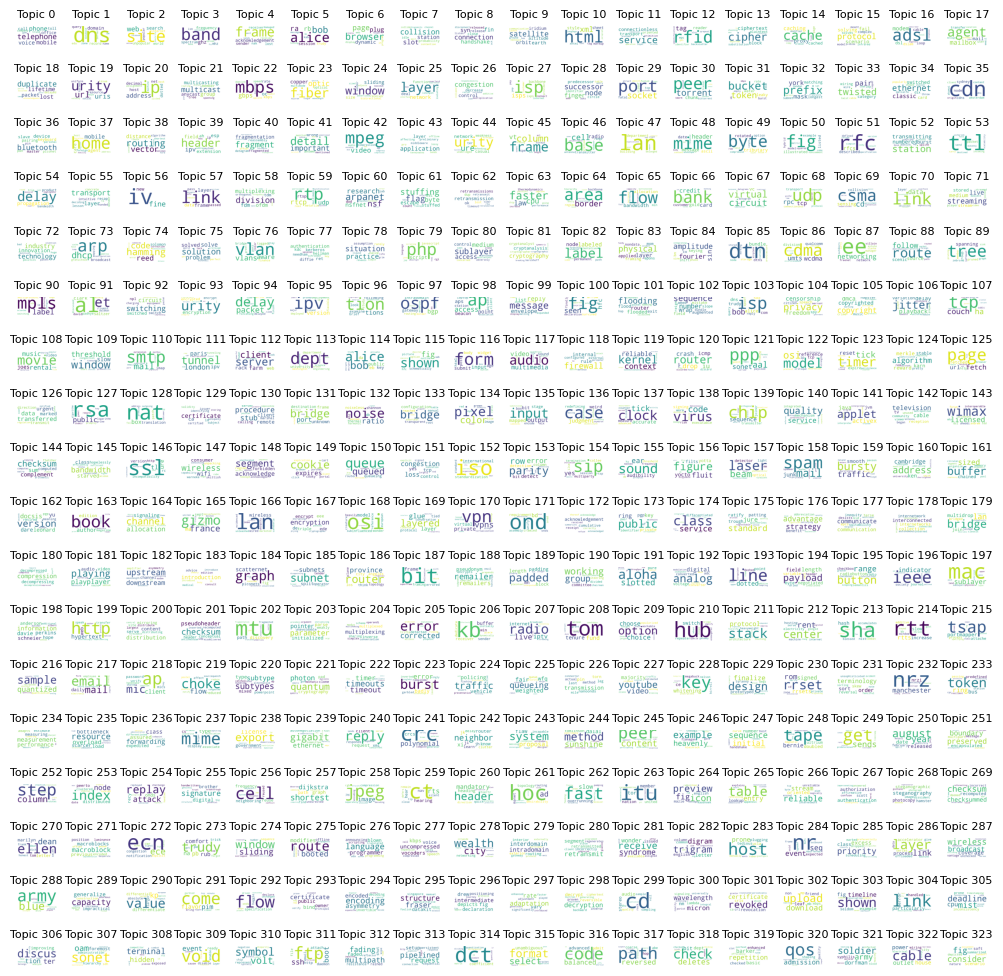

In [42]:
show_cloud([model.get_topic(i) for i in range(0, len(model.get_topic_info())-1)])

In [43]:
from math import ceil
def show_cloud_ceil(topics, topic_numbers):
    from matplotlib import pyplot as plt
    from wordcloud import WordCloud
    import matplotlib.colors as mcolors
    cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

    cloud = WordCloud(background_color="white",mask=None, max_words=10,\
                            max_font_size=60,min_font_size=10,prefer_horizontal=0.9,
                            contour_width=3,contour_color='black')

#     topics = [model.get_topic(i) for i in range(0, len(model.get_topic_info())-1)]
    # print(topics)
    fig, axes = plt.subplots(ceil(len(topics)**0.5), ceil(len(topics)**0.5), figsize=(10,10), sharex=True, sharey=True)
    
    for i, ax in enumerate(axes.flatten()):
        fig.add_subplot(ax)
        if i >= len(topics):
            fig.delaxes(ax)
            continue
        topic_words = dict(topics[i])
    #     print(topic_words)
        cloud.generate_from_frequencies(topic_words, max_font_size=300)
        plt.gca().imshow(cloud)
        plt.gca().set_title('Topic ' + str(topic_numbers[i]), fontdict=dict(size=8))
        plt.gca().axis('off')


    plt.subplots_adjust(wspace=0, hspace=0)
    plt.axis('off')
    plt.margins(x=0, y=0)
    plt.tight_layout()
    plt.show()

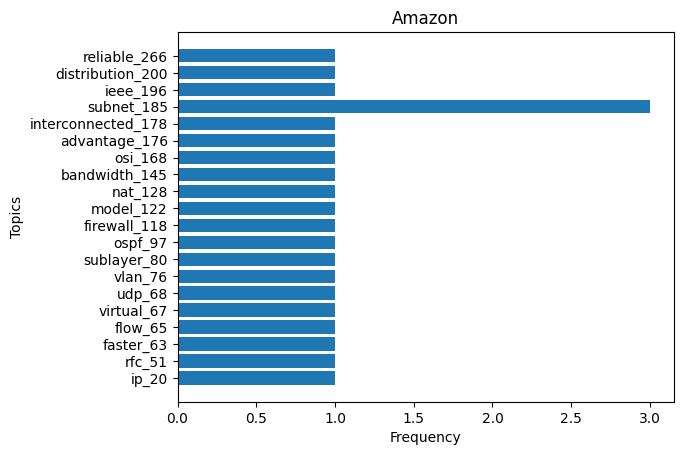

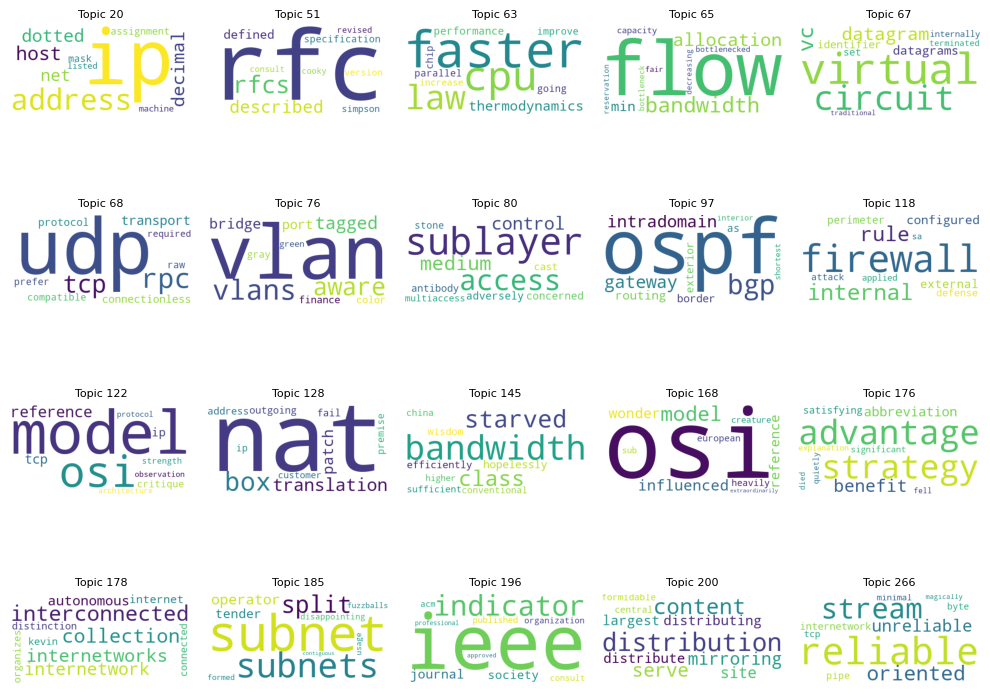

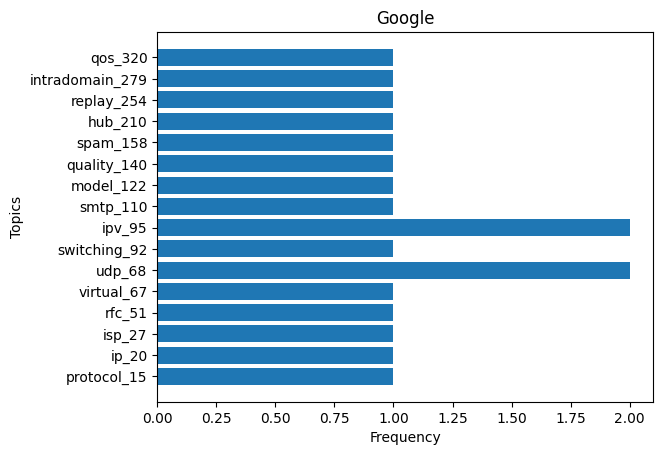

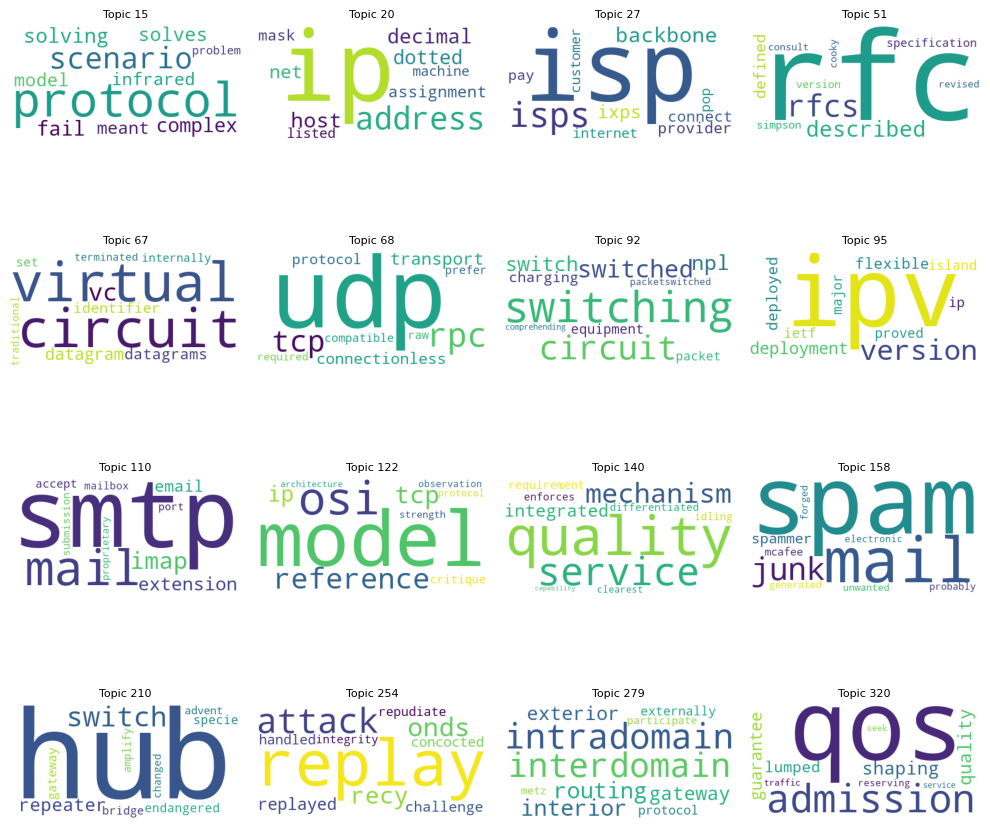

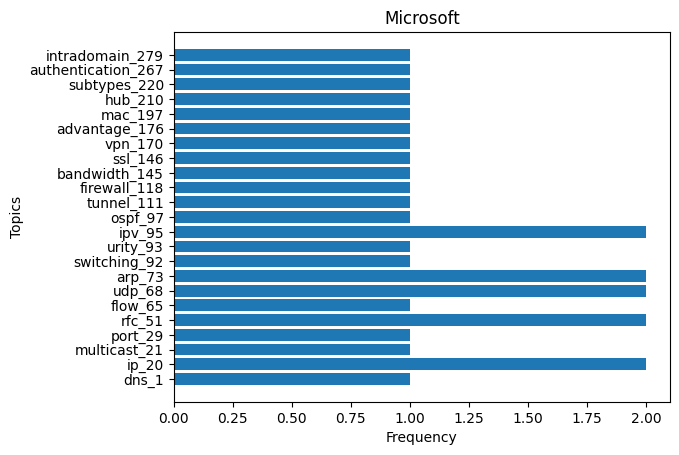

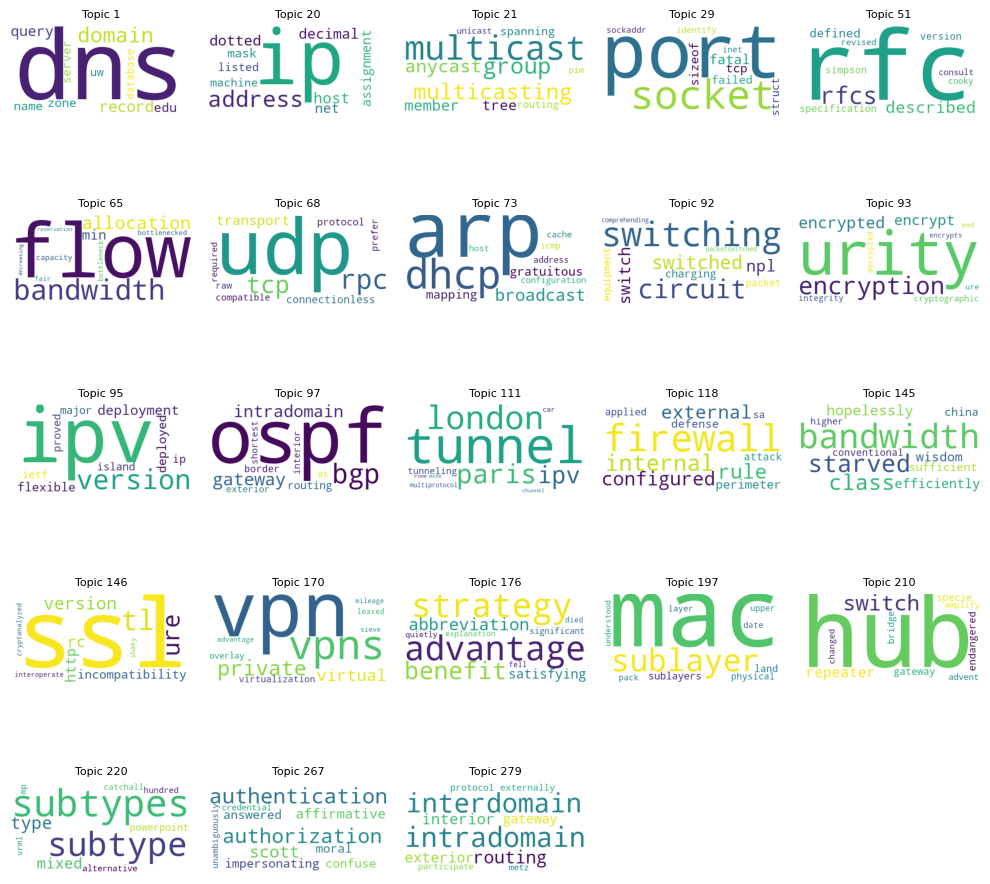

In [44]:
import matplotlib.pyplot as plt

# The given data
data = list_of_topics_per_company

# Extracting unique numbers from the data
unique_numbers = set()
for company_data in data.values():
    unique_numbers.update(set(company_data))
unique_numbers = sorted(list(unique_numbers))

# Counting frequency of each unique number for each company
company_frequencies = {}
for company_name, company_data in data.items():
    company_frequencies[company_name] = {}
    for number in unique_numbers:
        if number == -1:
            continue
        company_frequencies[company_name][number] = company_data.count(number)

# Plotting bar graph for each company
for company_name, company_frequency in company_frequencies.items():
    y_values = [key for key, value in company_frequency.items() if value > 0]
    for_cloud = [model.get_topic(topic_number) for topic_number in y_values]
    topic_numbers = [topic_number for topic_number in y_values]
    x_values = [company_frequency[key] for key in y_values]
    y_values = [acronym[value] for value in y_values]
    plt.barh(y_values, x_values)
    plt.title(company_name.capitalize())
    plt.xlabel('Frequency')
    plt.ylabel('Topics')
    plt.yticks(y_values)
    plt.show()
    show_cloud_ceil(for_cloud, topic_numbers)
